# Importing Libraries in notebook

In [197]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [198]:
#reading the data 
df_vehicles=pd.read_csv('vehicle.csv')
df_vehicles.head(5)

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio,class
0,95,48.0,83.0,178.0,72.0,10,162.0,42.0,20.0,159,176.0,379.0,184.0,70.0,6.0,16.0,187.0,197,van
1,91,41.0,84.0,141.0,57.0,9,149.0,45.0,19.0,143,170.0,330.0,158.0,72.0,9.0,14.0,189.0,199,van
2,104,50.0,106.0,209.0,66.0,10,207.0,32.0,23.0,158,223.0,635.0,220.0,73.0,14.0,9.0,188.0,196,car
3,93,41.0,82.0,159.0,63.0,9,144.0,46.0,19.0,143,160.0,309.0,127.0,63.0,6.0,10.0,199.0,207,van
4,85,44.0,70.0,205.0,103.0,52,149.0,45.0,19.0,144,241.0,325.0,188.0,127.0,9.0,11.0,180.0,183,bus


# EDA-Exploratory Data analysis

# 1. Descriptive statistics

In [199]:
#Shape of data
df_vehicles.shape

(846, 19)

In [200]:
#data types of data
df_vehicles.dtypes

compactness                      int64
circularity                    float64
distance_circularity           float64
radius_ratio                   float64
pr.axis_aspect_ratio           float64
max.length_aspect_ratio          int64
scatter_ratio                  float64
elongatedness                  float64
pr.axis_rectangularity         float64
max.length_rectangularity        int64
scaled_variance                float64
scaled_variance.1              float64
scaled_radius_of_gyration      float64
scaled_radius_of_gyration.1    float64
skewness_about                 float64
skewness_about.1               float64
skewness_about.2               float64
hollows_ratio                    int64
class                           object
dtype: object

In [201]:
#some more info
df_vehicles.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
compactness,846.0,93.678487,8.234474,73.0,87.00,93.0,100.0,119.0
circularity,841.0,44.828775,6.152172,33.0,40.00,44.0,49.0,59.0
distance_circularity,842.0,82.110451,15.778292,40.0,70.00,80.0,98.0,112.0
radius_ratio,840.0,168.888095,33.520198,104.0,141.00,167.0,195.0,333.0
pr.axis_aspect_ratio,844.0,61.678910,7.891463,47.0,57.00,61.0,65.0,138.0
max.length_aspect_ratio,846.0,8.567376,4.601217,2.0,7.00,8.0,10.0,55.0
scatter_ratio,845.0,168.901775,33.214848,112.0,147.00,157.0,198.0,265.0
elongatedness,845.0,40.933728,7.816186,26.0,33.00,43.0,46.0,61.0
pr.axis_rectangularity,843.0,20.582444,2.592933,17.0,19.00,20.0,23.0,29.0
max.length_rectangularity,846.0,147.998818,14.515652,118.0,137.00,146.0,159.0,188.0


From the above , we can see that columns scatter_ratio,elongatedness,scaled Variance,Scaled Variance.1 have mean > median with large difference.
So these could be potential outliers.

# 2.Presence of missing values 

In [202]:
#Checking for any null or missing value

for item in df_vehicles.columns[df_vehicles.isna().any()]:
    if df_vehicles[item].dtype==object:
        df_vehicles[item] = df_vehicles[item].fillna(df_vehicles[item].mode()[0])
    else:
        df_vehicles[item]=df_vehicles[item].fillna((df_vehicles[item].median()))
        
df_vehicles.isna().sum()

compactness                    0
circularity                    0
distance_circularity           0
radius_ratio                   0
pr.axis_aspect_ratio           0
max.length_aspect_ratio        0
scatter_ratio                  0
elongatedness                  0
pr.axis_rectangularity         0
max.length_rectangularity      0
scaled_variance                0
scaled_variance.1              0
scaled_radius_of_gyration      0
scaled_radius_of_gyration.1    0
skewness_about                 0
skewness_about.1               0
skewness_about.2               0
hollows_ratio                  0
class                          0
dtype: int64

There are no null values now 

# 3.Bivariate analysis

In [203]:
#sns.pairplot(df_vehicles,diag_kind='kde')

# 4. Five point summary 

In [204]:
#Interquntile range will suggest how disperse the data is 
print ('--------------First quartile---------------')
print (df_vehicles.quantile([.25, .50, .75]).iloc[0:1])
print ('--------------Second quartile---------------')
print (df_vehicles.quantile([.25, .50, .75]).iloc[1:2])
print ('--------------Third quartile---------------')
print (df_vehicles.quantile([.25, .50, .75]).iloc[2:3])
print ('--------------Minimum Value---------------')
print ('min value in (age) in data frame is \n '+str(df_vehicles.min()))
print ('--------------Max Value---------------')
print ('max value in (age) in data frame is \n '+str(df_vehicles.max()))

--------------First quartile---------------
      compactness  circularity  distance_circularity  radius_ratio  \
0.25         87.0         40.0                  70.0         141.0   

      pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
0.25                  57.0                      7.0          147.0   

      elongatedness  pr.axis_rectangularity  max.length_rectangularity  \
0.25           33.0                    19.0                      137.0   

      scaled_variance  scaled_variance.1  scaled_radius_of_gyration  \
0.25            167.0             318.25                      149.0   

      scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
0.25                         67.0             2.0               5.0   

      skewness_about.2  hollows_ratio  
0.25             184.0         190.25  
--------------Second quartile---------------
     compactness  circularity  distance_circularity  radius_ratio  \
0.5         93.0         44.0                

# 5.Detecting outlier 

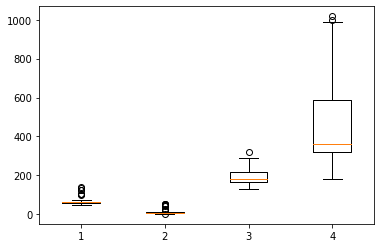

In [205]:
box_plot_data=[df_vehicles['pr.axis_aspect_ratio'],df_vehicles['max.length_aspect_ratio'],df_vehicles['scaled_variance'],df_vehicles['scaled_variance.1']]
plt.boxplot(box_plot_data)
plt.show()

In [206]:
#Function to find outliers 
def finding_outliers(df,col_name):
    from numpy import percentile
    q25,q75=percentile(df[col_name],25),percentile(df[col_name],75)
    iqr=q75-q25
    cutoff=iqr*1.5
    upperlimit,lowerlimit=q75+cutoff,q25-cutoff
    outliers=[x for x in df[col_name] if x<lowerlimit or x>upperlimit]
    return outliers
    

In [207]:
#Excluding the class column

In [208]:
df_car=df_vehicles.iloc[:,0:19]

In [209]:
outlier_cloumns=[]
for items in df_vehicles.iloc[:,0:18].columns:
    outliers_=finding_outliers(df_car,items)
    if len(outliers_)==0:
        pass  
    else:
        print ('There are '+str(len(outliers_))+' outliers for column '+items)
        outlier_cloumns.append(items)

There are 3 outliers for column radius_ratio
There are 8 outliers for column pr.axis_aspect_ratio
There are 13 outliers for column max.length_aspect_ratio
There are 1 outliers for column scaled_variance
There are 2 outliers for column scaled_variance.1
There are 15 outliers for column scaled_radius_of_gyration.1
There are 12 outliers for column skewness_about
There are 1 outliers for column skewness_about.1


# 5.1 Plotting graph on outliers columns

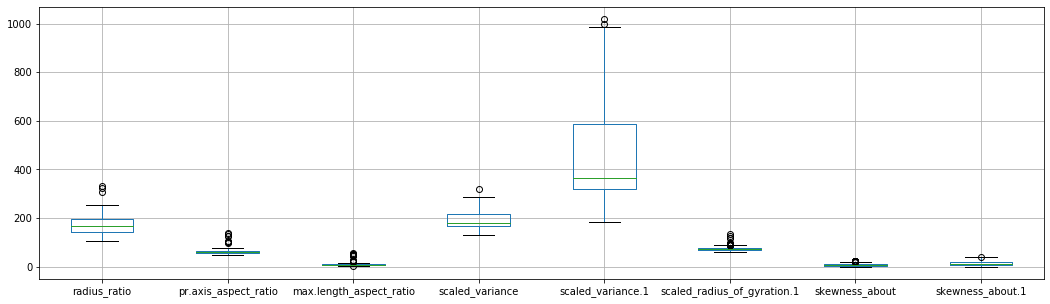

In [210]:
df_car.boxplot(column=outlier_cloumns,figsize=(18,5))

# 6. Removing outliers 

In [211]:
for item in outlier_cloumns:
    df_car[item]=df_car[item].mask((df_car[item] - df_car[item].mean()).abs() > 1.5 * df_car[item].std())

In [212]:
df_car=df_car.dropna()

print ('Shape of data after removing outliers')
print (df_car.shape)
print ('Shape of data before removing outliers')
print (df_vehicles.shape)
#print (df.shape)

Shape of data after removing outliers
(504, 19)
Shape of data before removing outliers
(846, 19)


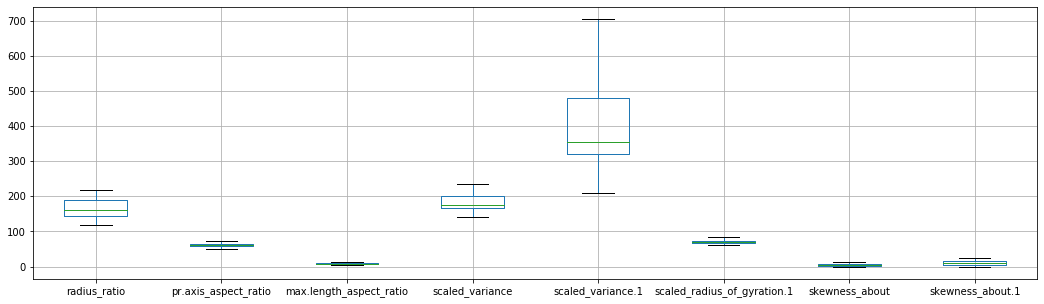

In [213]:
df_car.boxplot(column=outlier_cloumns,figsize=(18,5))

In [214]:
#We can see that there is no outlier value is present for the columns

# Splitting the data between X and Y 

In [215]:
#Handling target variable 'class'
#Convering the categorical data into cat code 
df_car['class']=df_car['class'].astype('category')
df_car['class']=df_car['class'].cat.codes
df_car.groupby('class').describe()

compactness                                                       \
            count       mean       std   min   25%   50%    75%    max   
class                                                                    
0           139.0  89.489209  6.729092  78.0  84.0  88.0   95.0  105.0   
1           224.0  94.906250  7.808536  77.0  89.0  94.0  101.0  113.0   
2           141.0  90.737589  3.430213  83.0  89.0  90.0   93.0   98.0   

      circularity             ... skewness_about.2        hollows_ratio  \
            count       mean  ...              75%    max         count   
class                         ...                                         
0           139.0  43.438849  ...            196.0  202.0         139.0   
1           224.0  45.267857  ...            192.0  202.0         224.0   
2           141.0  42.843972  ...            193.0  204.0         141.0   

                                                                
             mean       std    min    25%    50%    75%    max  
class                                                           
0      194.194245  7.510261  182.0  187.0  195.0  200.0  209.0  
1      196.941964  5.522171  183.0  194.0  197.0  201.0  210.0  
2      197.177305  6.233875  183.0  193.0  197.0  201.0  210.0  

[3 rows x 144 columns]

In [216]:
X=df_car.drop(['class'],axis=1,inplace=False)
y=df_car['class']
print (X.shape)
print (y.shape)

(504, 18)
(504,)


In [217]:
from sklearn.model_selection import train_test_split
#splitting the data into four variables , 70% of data will be used to train the model and rest 30% is to test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

# Relationships between different Independent attributes

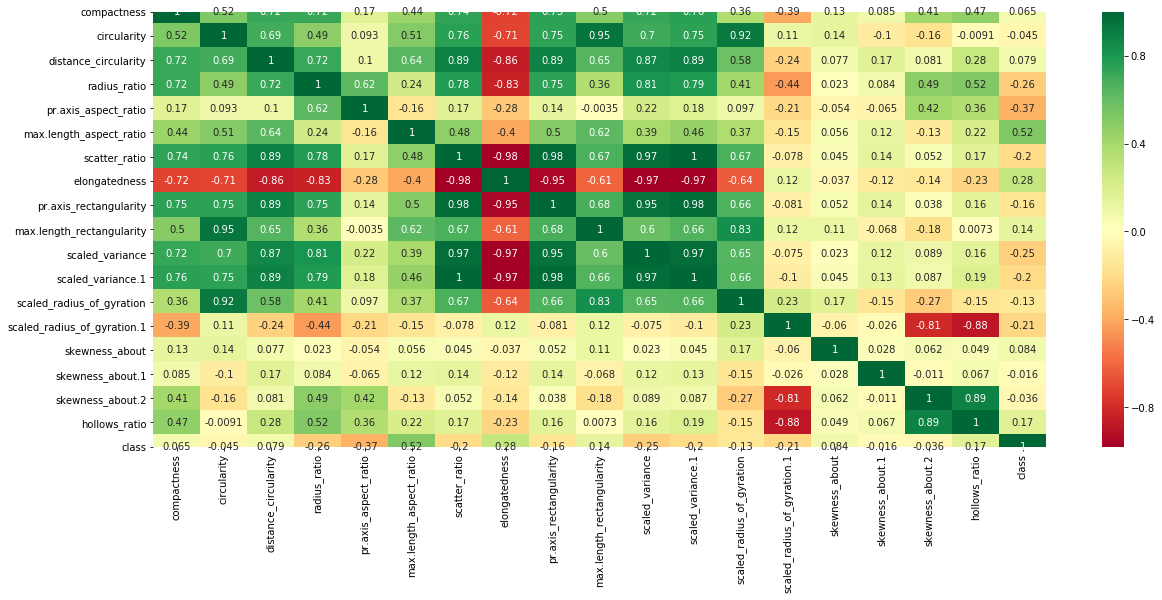

In [218]:
#Drawing the heatmap for correlation 
f, ax = plt.subplots(figsize =(20, 8)) 
sns.heatmap(df_car.corr(),annot=True,cmap="RdYlGn")

Now we can graphically see that many indpendent variables are weakly correlated to dependent variable 'Class'.
e.g. compactness,circularity etc.

We will try to find the columns which have correlation value between -.2 to .2 , and will drop them.

In [219]:

cor=df_car.corr()
cor_target=abs(cor["class"])
#df['two'].between(-0.5, 0.5, inclusive=False)
relevant_features=cor_target[cor_target.between(-0.2, 0.2, inclusive=False)] 
relevant_features

compactness                  0.065160
circularity                  0.044726
distance_circularity         0.079041
pr.axis_rectangularity       0.156775
max.length_rectangularity    0.136147
scaled_radius_of_gyration    0.130277
skewness_about               0.084393
skewness_about.1             0.015816
skewness_about.2             0.035851
hollows_ratio                0.172420
Name: class, dtype: float64

In [220]:
#dropping the independent column with weak correlation 
df_car_corr=df_car.copy()
low_corr_columns=['compactness','circularity','distance_circularity','pr.axis_rectangularity','max.length_rectangularity','scaled_radius_of_gyration','skewness_about','skewness_about.1','skewness_about.2','hollows_ratio']
for items in low_corr_columns:
    print (items)
    df_car_corr.drop([items],axis=1,inplace=True)
df_car_corr.dtypes

compactness
circularity
distance_circularity
pr.axis_rectangularity
max.length_rectangularity
scaled_radius_of_gyration
skewness_about
skewness_about.1
skewness_about.2
hollows_ratio


radius_ratio                   float64
pr.axis_aspect_ratio           float64
max.length_aspect_ratio        float64
scatter_ratio                  float64
elongatedness                  float64
scaled_variance                float64
scaled_variance.1              float64
scaled_radius_of_gyration.1    float64
class                             int8
dtype: object

# SVM after column is dropped using correlation matrix

In [221]:
X=df_car_corr.drop(['class'],axis=1,inplace=False)
y=df_car_corr['class']
print (X.shape)
print (y.shape)

(504, 8)
(504,)


In [222]:
#Splitting the data
from sklearn.model_selection import train_test_split
#splitting the data into four variables , 70% of data will be used to train the model and rest 30% is to test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [223]:
#importing necessary libraries 
from sklearn import svm
clf = svm.SVC(gamma=0.025, C=3) 
clf.fit(X_train , y_train)

predicted = clf.predict(X_test)

In [224]:
score=round (clf.score(X_test,y_test)*100,2)
print (score)

78.29


We can see that the score after removing the matrix is 78.29

# PCA-Principal Component Analysis

In [225]:
X=df_car.drop(['class'],axis=1,inplace=False)
y=df_car['class']
print (X.shape)
print (y.shape)

(504, 18)
(504,)


In [226]:
#Splitting the data
from sklearn.model_selection import train_test_split
#splitting the data into four variables , 70% of data will be used to train the model and rest 30% is to test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [227]:
X.head(5)

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio
0,95,48.0,83.0,178.0,72.0,10.0,162.0,42.0,20.0,159,176.0,379.0,184.0,70.0,6.0,16.0,187.0,197
1,91,41.0,84.0,141.0,57.0,9.0,149.0,45.0,19.0,143,170.0,330.0,158.0,72.0,9.0,14.0,189.0,199
3,93,41.0,82.0,159.0,63.0,9.0,144.0,46.0,19.0,143,160.0,309.0,127.0,63.0,6.0,10.0,199.0,207
6,97,43.0,73.0,173.0,65.0,6.0,153.0,42.0,19.0,143,176.0,361.0,172.0,66.0,13.0,1.0,200.0,204
7,90,43.0,66.0,157.0,65.0,9.0,137.0,48.0,18.0,146,162.0,281.0,164.0,67.0,3.0,3.0,193.0,202


In [228]:
from scipy.stats import zscore
X=X.apply(zscore)
X.head()

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio
0,0.395354,0.772244,0.207040,0.482047,2.076351,1.039768,-0.020596,0.034799,-0.018048,1.084076,-0.305771,-0.188514,0.480321,-0.223987,0.181233,0.766606,-0.432205,0.116633
1,-0.178878,-0.608636,0.286816,-0.923395,-0.946995,0.479294,-0.547716,0.521987,-0.553113,-0.274008,-0.573864,-0.573016,-0.442436,0.176686,0.984825,0.479129,-0.091577,0.427655
3,0.108238,-0.608636,0.127263,-0.239667,0.262343,0.479294,-0.750454,0.684383,-0.553113,-0.274008,-1.020685,-0.737803,-1.542646,-1.626342,0.181233,-0.095826,1.611559,1.671744
6,0.682470,-0.214099,-0.590728,0.292122,0.665456,-1.202127,-0.385525,0.034799,-0.553113,-0.274008,-0.305771,-0.329760,0.054433,-1.025333,2.056281,-1.389474,1.781872,1.205210
7,-0.322436,-0.214099,-1.149165,-0.315637,0.665456,0.479294,-1.034288,1.009175,-1.088177,-0.019368,-0.931321,-0.957518,-0.229492,-0.824996,-0.622358,-1.101997,0.589677,0.894188


In [229]:
#Covariance matrix
covMatrix = np.cov(X,rowvar=False)
print(covMatrix)

[[ 1.00198807  0.52187889  0.71832046  0.71922185  0.16661486  0.44021934
   0.74283543 -0.71976337  0.74962191  0.5032695   0.72346378  0.76149079
   0.3652894  -0.3956419   0.1312555   0.08509644  0.4088097   0.47392563]
 [ 0.52187889  1.00198807  0.69246623  0.4882473   0.09351037  0.50748877
   0.7565637  -0.71133015  0.75303531  0.94693636  0.7052864   0.74920138
   0.92522843  0.10916528  0.13647234 -0.10370578 -0.15971325 -0.0091331 ]
 [ 0.71832046  0.69246623  1.00198807  0.72117125  0.10052167  0.63997499
   0.89471939 -0.86431133  0.89097879  0.64721301  0.87023565  0.88780116
   0.58290382 -0.24113335  0.07702398  0.16842589  0.08096347  0.27937291]
 [ 0.71922185  0.4882473   0.72117125  1.00198807  0.62592902  0.23919657
   0.78196176 -0.83486462  0.7532848   0.36400039  0.8153753   0.79168911
   0.41338784 -0.44036631  0.02276781  0.08440598  0.49025719  0.52180716]
 [ 0.16661486  0.09351037  0.10052167  0.62592902  1.00198807 -0.15653334
   0.17213259 -0.27796587  0.13874

In [230]:
from sklearn.decomposition import PCA
pca = PCA(n_components=18)
pca.fit(X)

PCA(copy=True, iterated_power='auto', n_components=18, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [231]:
print(pca.explained_variance_)

[9.07416859e+00 3.43398579e+00 1.38136548e+00 1.27608677e+00
 9.71963047e-01 6.82132745e-01 4.22682584e-01 3.00842137e-01
 1.52553011e-01 9.58892372e-02 8.08855991e-02 5.06711576e-02
 3.44575398e-02 2.56417076e-02 2.06639817e-02 1.79399601e-02
 1.32588698e-02 5.97083799e-04]


In [232]:
print(pca.explained_variance_ratio_)

[5.03120238e-01 1.90398462e-01 7.65902596e-02 7.07530473e-02
 5.38908083e-02 3.78210726e-02 2.34357738e-02 1.66802904e-02
 8.45835144e-03 5.31661004e-03 4.48472843e-03 2.80947886e-03
 1.91050954e-03 1.42171285e-03 1.14572121e-03 9.94686942e-04
 7.35142361e-04 3.31055060e-05]


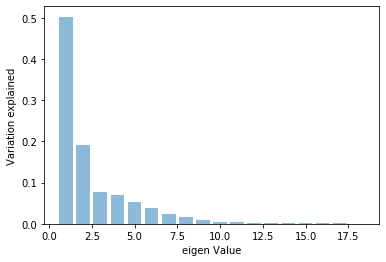

In [233]:
import matplotlib.pyplot as plt 
plt.bar(list(range(1,19)),pca.explained_variance_ratio_,alpha=0.5, align='center')
plt.ylabel('Variation explained')
plt.xlabel('eigen Value')
plt.show()

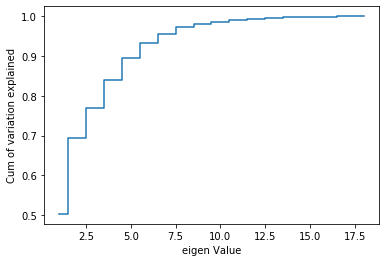

In [234]:
plt.step(list(range(1,19)),np.cumsum(pca.explained_variance_ratio_), where='mid')
plt.ylabel('Cum of variation explained')
plt.xlabel('eigen Value')
plt.show()

As we can see that after the 10 component the graph is almost becoming uniform so we will choose 10 as our PC value

In [235]:
pca3 = PCA(n_components=10)
pca3.fit(X)
print(pca3.components_)
print(pca3.explained_variance_ratio_)
Xpca3 = pca3.transform(X)

[[ 0.2654817   0.27283448  0.30535245  0.27283458  0.0798052   0.18498781
   0.3226705  -0.31725748  0.31925397  0.25027796  0.31439218  0.3222507
   0.23965784 -0.06216624  0.03160127  0.03084404  0.04845307  0.09589437]
 [ 0.15999743 -0.20323821  0.00243178  0.23419525  0.2452516  -0.07808121
  -0.04158201 -0.0057458  -0.04868898 -0.21413084 -0.02115272 -0.02551734
  -0.25479907 -0.46525615 -0.00411899  0.04213578  0.50390471  0.47309113]
 [-0.13537192  0.00971158 -0.15289343  0.25229505  0.5667311  -0.51579269
   0.04656261 -0.12870836  0.0126916  -0.13341785  0.12561343  0.05274673
   0.11529155  0.24812106 -0.25300265 -0.27921738  0.01390409 -0.18720635]
 [ 0.00630831  0.28720286 -0.09745381 -0.05405842  0.09618112  0.07439216
  -0.14083853  0.13102772 -0.13157515  0.29788312 -0.16336331 -0.13265903
   0.29903313 -0.13472546  0.34023382 -0.66168229  0.13584744  0.15272607]
 [ 0.01596523 -0.03358716 -0.05179038  0.06073471  0.09586813 -0.29136086
   0.021545   -0.04143616  0.011365

# Implementing Support vector machine without doing PCA

In [236]:
#importing necessary libraries 
from sklearn import svm
clf = svm.SVC(gamma=0.025, C=3) 
clf.fit(X_train , y_train)

predicted = clf.predict(X_test)

In [237]:
score=round (clf.score(X_test,y_test)*100,2)
print (score)

54.61


In [238]:
from sklearn import metrics
print (metrics.confusion_matrix(y_test,predicted))

[[ 3 41  0]
 [ 0 79  0]
 [ 0 28  1]]


In [239]:
from sklearn import metrics
def myscores(smat): 
    tp = smat[0][0] 
    fp = smat[0][1] 
    fn = smat[1][0] 
    tn = smat[1][1] 
    return tp/(tp+fp), tp/(tp+fn)

recall=round(myscores(metrics.confusion_matrix(y_test,predicted))[0]*100,2)
precision=round(myscores(metrics.confusion_matrix(y_test,predicted))[1]*100,2)
print ('recall is ==>'+str(recall))
print ('precision is ==>'+str(precision))

recall is ==>6.82
precision is ==>100.0


# Implementing Support vector machine with  PCA

In [240]:
from sklearn.model_selection import train_test_split
#splitting the data into four variables , 70% of data will be used to train the model and rest 30% is to test
X_train, X_test, y_train, y_test = train_test_split(Xpca3, y, test_size=0.3, random_state=1)

In [241]:
#Getting the shapes of data
print (X_test.shape)
print (X_train.shape)
print (y_test.shape)
print (y_train.shape)

(152, 10)
(352, 10)
(152,)
(352,)


In [242]:
#importing necessary libraries 
from sklearn import svm
clf = svm.SVC(gamma=0.025, C=3) 
clf.fit(X_train , y_train)

predicted = clf.predict(X_test)

In [243]:
train_score=round (clf.score(X_train,y_train)*100,2)
test_score=round (clf.score(X_test,y_test)*100,2)
print (train_score)
print (test_score)

96.88
96.05


In [244]:
from sklearn import metrics
def myscores(smat): 
    tp = smat[0][0] 
    fp = smat[0][1] 
    fn = smat[1][0] 
    tn = smat[1][1] 
    return tp/(tp+fp), tp/(tp+fn)

recall=round(myscores(metrics.confusion_matrix(y_test,predicted))[0]*100,2)
precision=round(myscores(metrics.confusion_matrix(y_test,predicted))[1]*100,2)
print ('recall is ==>'+str(recall))
print ('precision is ==>'+str(precision))

recall is ==>97.73
precision is ==>93.48


# Final Summary

#Score after removing independent column using correlation matrix: 78.29

Score  without using PCA   : 54.29 %

Score after using PCA : 96%